In [ ]:
# Importar bibliotecas principais
import pandas as pd

# Verificar arquivos enviados
from google.colab import files
uploaded = files.upload()


Saving big_tech_companies.csv to big_tech_companies.csv
Saving big_tech_stock_prices.xlsx to big_tech_stock_prices.xlsx


In [ ]:
# Importar bibliotecas
import pandas as pd

# Ler o CSV (informações das empresas)
df_companies = pd.read_csv('big_tech_companies.csv')

# Ler o Excel (preços das ações)
df_prices = pd.read_excel('big_tech_stock_prices.xlsx')

# Visualizar as 5 primeiras linhas de cada base
print("📄 Empresas:")
display(df_companies.head())

print("📈 Preços das Ações:")
display(df_prices.head())



📄 Empresas:


,stock_symbol,company
0,AAPL,Apple Inc.
1,ADBE,Adobe Inc.
2,AMZN,"Amazon.com, Inc."
3,CRM,"Salesforce, Inc."
4,CSCO,"Cisco Systems, Inc."


📈 Preços das Ações:


,stock_symbol,date,open,high,low,close,adj_close,volume
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600.0
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800.0
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000.0
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200.0
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800.0


In [ ]:
# Ver tipos de dados
print("Tipos de dados - Companies:")
print(df_companies.dtypes)

print("\nTipos de dados - Prices:")
print(df_prices.dtypes)

# Resumo estatístico das variáveis numéricas
df_prices.describe()


Tipos de dados - Companies:
stock_symbol    object
company         object
dtype: object

Tipos de dados - Prices:
stock_symbol            object
date            datetime64[ns]
open                   float64
high                   float64
low                    float64
close                  float64
adj_close              float64
volume                 float64
dtype: object


,date,open,high,low,close,adj_close,volume
count,45089,45089.000000,45089.000000,45089.000000,45089.000000,45089.000000,4.508900e+04
mean,2016-08-03 16:49:50.565326336,89.267274,90.370562,88.112582,89.272028,85.210443,5.298188e+07
min,2010-01-04 00:00:00,1.076000,1.108667,0.998667,1.053333,1.053333,5.892000e+05
25%,2013-05-30 00:00:00,25.670000,25.930180,25.360001,25.660000,22.077059,9.629500e+06
50%,2016-08-09 00:00:00,47.930000,48.459999,47.470001,47.970001,45.378979,2.646420e+07
75%,2019-10-22 00:00:00,128.660004,129.847031,127.250000,128.639999,113.679848,5.840030e+07
max,2023-01-24 00:00:00,696.280029,700.989990,686.090027,691.690002,691.690002,1.880998e+09
std,NaN,101.625934,103.000049,100.123385,101.591905,100.994995,9.324966e+07


In [ ]:
# Exibir as linhas do df_prices que contêm ao menos 1 valor nulo
df_prices[df_prices.isnull().any(axis=1)]

# Exibir índices + linhas com nulos
nulos_prices = df_prices[df_prices.isnull().any(axis=1)]
print(f"Total de linhas com nulos: {nulos_prices.shape[0]}")
print("Índices das linhas com nulos:")
print(nulos_prices.index.tolist())
nulos_prices

df_companies[df_companies.isnull().any(axis=1)]

print("Valores nulos - Prices:")
print(df_prices.isnull().sum())

print("\nValores nulos - Companies:")
print(df_companies.isnull().sum())

Total de linhas com nulos: 1
Índices das linhas com nulos:
[45089]
Valores nulos - Prices:
stock_symbol    0
date            1
open            1
high            1
low             1
close           1
adj_close       1
volume          1
dtype: int64

Valores nulos - Companies:
stock_symbol    0
company         0
dtype: int64


In [ ]:
# Remover linha com qualquer valor nulo
df_prices = df_prices.dropna()

# Verificar novamente se há nulos
print("Valores nulos após remoção:")
print(df_prices.isnull().sum())


Valores nulos após remoção:
stock_symbol    0
date            0
open            0
high            0
low             0
close           0
adj_close       0
volume          0
dtype: int64


In [ ]:
# Verificar duplicatas completas (linhas repetidas)
duplicatas = df_prices.duplicated()
print(f"Número total de linhas duplicadas: {duplicatas.sum()}")

# Filtrar e mostrar todas as linhas duplicadas completas
duplicatas_completas = df_prices[df_prices.duplicated(keep=False)]

# Exibir as duplicatas
duplicatas_completas



Número total de linhas duplicadas: 1


,stock_symbol,date,open,high,low,close,adj_close,volume
45087,TSLA,2022-12-29,120.389999,123.57,117.5,121.82,121.82,221923300.0
45088,TSLA,2022-12-29,120.389999,123.57,117.5,121.82,121.82,221923300.0


In [ ]:
# Remove todas as duplicatas completas, mantendo apenas a primeira ocorrência
df_prices = df_prices.drop_duplicates(keep='first')

print(f"Duplicatas restantes: {df_prices.duplicated().sum()}")


Duplicatas restantes: 0


In [ ]:
# Verificar valores nulos
nulos_data = df_prices['date'].isnull().sum()
print(f"Número de datas nulas: {nulos_data}")

# Período total coberto pelos dados
data_minima = df_prices['date'].min()
data_maxima = df_prices['date'].max()

print(f"Menor data registrada: {data_minima}")
print(f"Maior data registrada: {data_maxima}")

import datetime

datas_futuras = df_prices[df_prices['date'] > pd.Timestamp(datetime.datetime.today())]
print(f"Registros com datas no futuro: {datas_futuras.shape[0]}")

# Verificar duplicações por empresa + data
duplicatas_data_empresa = df_prices[df_prices.duplicated(subset=['stock_symbol', 'date'], keep=False)]
print(f"Número de datas duplicadas por empresa: {duplicatas_data_empresa.shape[0]}")


Número de datas nulas: 0
Menor data registrada: 2010-01-04 00:00:00
Maior data registrada: 2023-01-24 00:00:00
Registros com datas no futuro: 0
Número de datas duplicadas por empresa: 0


In [ ]:
# Verificar se há preços menores ou iguais a 0
fora_escopo = df_prices[
    (df_prices['open'] <= 0) |
    (df_prices['high'] <= 0) |
    (df_prices['low'] <= 0) |
    (df_prices['close'] <= 0) |
    (df_prices['adj_close'] <= 0)
]

print(f"Número de registros com valores inválidos de preço: {fora_escopo.shape[0]}")


Número de registros com valores inválidos de preço: 0


In [ ]:
volume_invalido = df_prices[df_prices['volume'] <= 0]
print(f"Número de registros com volume <= 0: {volume_invalido.shape[0]}")


Número de registros com volume <= 0: 0


In [ ]:
# Ver categorias únicas
print("Símbolos únicos encontrados:")
print(sorted(df_prices['stock_symbol'].unique()))


Símbolos únicos encontrados:
['AAPL', 'ADBE', 'AMZN', 'CRM', 'CSCO', 'GOOGL', 'IBM', 'INTC', 'META', 'MSFT', 'NFLX', 'NVDA', 'ORCL', 'TSLA']


In [ ]:
# Junção pela chave 'stock_symbol'
df_merged = pd.merge(df_prices, df_companies, on='stock_symbol', how='left')

# Exibir primeiras linhas da base resultante
df_merged.head()

,stock_symbol,date,open,high,low,close,adj_close,volume,company
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600.0,Apple Inc.
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800.0,Apple Inc.
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000.0,Apple Inc.
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200.0,Apple Inc.
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800.0,Apple Inc.


In [ ]:
# Verificar valores nulos após a junção
print("Valores nulos por coluna após o merge:")
print(df_merged.isnull().sum())


Valores nulos por coluna após o merge:
stock_symbol    0
date            0
open            0
high            0
low             0
close           0
adj_close       0
volume          0
company         0
dtype: int64


In [ ]:
# Informações gerais sobre o DataFrame
df_merged.info()

# Número de valores únicos por coluna
print(df_merged.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45088 entries, 0 to 45087
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   stock_symbol  45088 non-null  object        
 1   date          45088 non-null  datetime64[ns]
 2   open          45088 non-null  float64       
 3   high          45088 non-null  float64       
 4   low           45088 non-null  float64       
 5   close         45088 non-null  float64       
 6   adj_close     45088 non-null  float64       
 7   volume        45088 non-null  float64       
 8   company       45088 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 3.1+ MB
stock_symbol       14
date             3287
open            29798
high            30056
low             30028
close           30965
adj_close       41279
volume          43550
company            14
dtype: int64


In [ ]:
# Selecionar colunas numéricas
colunas_numericas = df_prices.select_dtypes(include='number').columns.tolist()
print("Colunas numéricas:", colunas_numericas)


Colunas numéricas: ['open', 'high', 'low', 'close', 'adj_close', 'volume']


In [ ]:
# Função para contar outliers por coluna usando IQR
def detectar_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lim_inf) | (df[col] > lim_sup)]
    return outliers

# Detectar outliers por coluna
for col in colunas_numericas:
    outliers = detectar_outliers_iqr(df_prices, col)
    print(f"{col}: {len(outliers)} outliers encontrados")


open: 2553 outliers encontrados
high: 2594 outliers encontrados
low: 2514 outliers encontrados
close: 2555 outliers encontrados
adj_close: 3333 outliers encontrados
volume: 3462 outliers encontrados


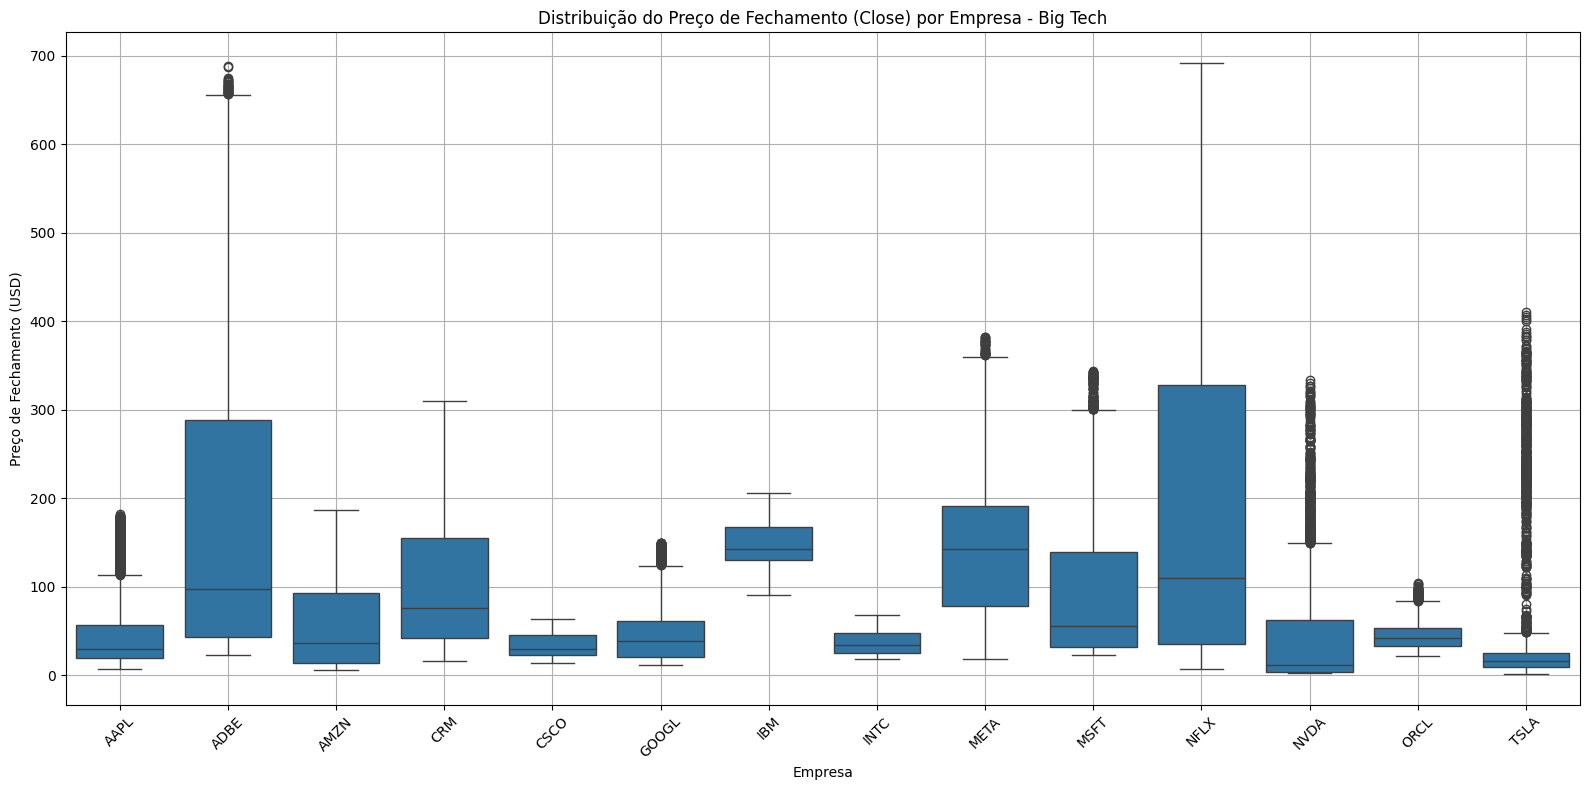

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar o tamanho do gráfico
plt.figure(figsize=(16, 8))

# Boxplot do preço de fechamento por empresa
sns.boxplot(data=df_prices, x='stock_symbol', y='close')

# Títulos e labels
plt.title('Distribuição do Preço de Fechamento (Close) por Empresa - Big Tech')
plt.xlabel('Empresa')
plt.ylabel('Preço de Fechamento (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Calcular amplitude de preço por empresa
df_amplitude = df_prices.groupby('stock_symbol')['close'].agg(['min', 'max'])
df_amplitude['amplitude'] = df_amplitude['max'] - df_amplitude['min']

# Classificar perfil de risco por amplitude
def classificar_risco(amplitude):
    if amplitude < 100:
        return 'Conservador'
    elif amplitude < 300:
        return 'Moderado'
    else:
        return 'Agressivo'

df_amplitude['perfil_risco'] = df_amplitude['amplitude'].apply(classificar_risco)
print(df_amplitude[['amplitude', 'perfil_risco']])


               amplitude perfil_risco
stock_symbol                         
AAPL          175.151066     Moderado
ADBE          665.679994    Agressivo
AMZN          181.139996     Moderado
CRM           294.439991     Moderado
CSCO           50.229999  Conservador
GOOGL         138.925838     Moderado
IBM           115.707458     Moderado
INTC           50.800001  Conservador
META          364.449993    Agressivo
MSFT          320.099985    Agressivo
NFLX          684.671431    Agressivo
NVDA          331.540010    Agressivo
ORCL           82.190003  Conservador
TSLA          408.916668    Agressivo


<ipython-input-77-200705b3d70a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_volume, x='stock_symbol', y='volume', palette='Blues_d')


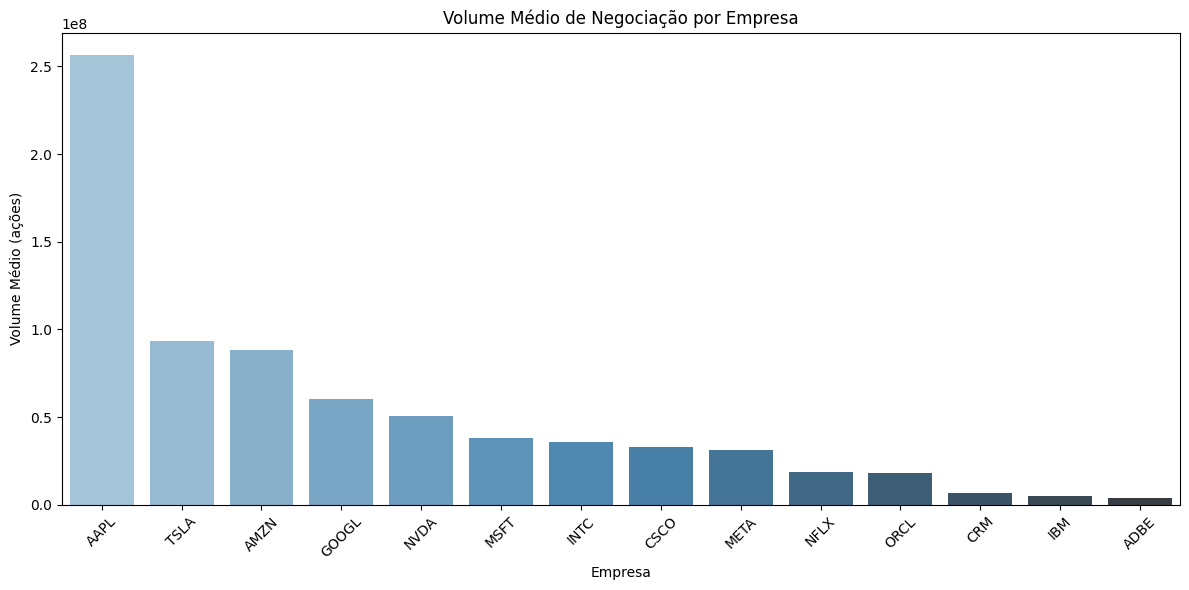

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular volume médio por empresa
df_volume = df_prices.groupby('stock_symbol')['volume'].mean().reset_index()
df_volume = df_volume.sort_values(by='volume', ascending=False)

# Plotar gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(data=df_volume, x='stock_symbol', y='volume', palette='Blues_d')
plt.title('Volume Médio de Negociação por Empresa')
plt.ylabel('Volume Médio (ações)')
plt.xlabel('Empresa')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Calcular desvio padrão por empresa
df_volatilidade = df_prices.groupby('stock_symbol')['close'].std().reset_index()
df_volatilidade.columns = ['stock_symbol', 'std_close']

# Combinar com classificação de risco
df_segmentacao = df_amplitude[['amplitude', 'perfil_risco']].merge(df_volatilidade, on='stock_symbol')
df_segmentacao = df_segmentacao.sort_values(by='std_close', ascending=False)

print(df_segmentacao)


   stock_symbol   amplitude perfil_risco   std_close
10         NFLX  684.671431    Agressivo  178.877130
1          ADBE  665.679994    Agressivo  173.466083
13         TSLA  408.916668    Agressivo   95.544413
9          MSFT  320.099985    Agressivo   88.234393
8          META  364.449993    Agressivo   86.763257
3           CRM  294.439991     Moderado   71.213839
11         NVDA  331.540010    Agressivo   69.480441
2          AMZN  181.139996     Moderado   54.085034
0          AAPL  175.151066     Moderado   47.344344
5         GOOGL  138.925838     Moderado   35.803048
6           IBM  115.707458     Moderado   24.016125
12         ORCL   82.190003  Conservador   16.863128
7          INTC   50.800001  Conservador   12.912266
4          CSCO   50.229999  Conservador   12.646739


In [ ]:
# Agrupando: amplitude, desvio padrão, volume médio
df_agg = df_prices.groupby('stock_symbol').agg(
    preco_min=('close', 'min'),
    preco_max=('close', 'max'),
    amplitude=('close', lambda x: x.max() - x.min()),
    desvio_padrao=('close', 'std'),
    volume_medio=('volume', 'mean')
).reset_index()

# Classificar perfil de risco com base na amplitude
def classificar_risco(amplitude):
    if amplitude < 100:
        return 'Conservador'
    elif amplitude < 300:
        return 'Moderado'
    else:
        return 'Agressivo'

df_agg['perfil_risco'] = df_agg['amplitude'].apply(classificar_risco)

# Organizar colunas
df_agg = df_agg[['stock_symbol', 'preco_min', 'preco_max', 'amplitude', 'desvio_padrao', 'volume_medio', 'perfil_risco']]

# Exibir resultado
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)  # Melhorar visualização

display(df_agg.sort_values(by='amplitude', ascending=False))


,stock_symbol,preco_min,preco_max,amplitude,desvio_padrao,volume_medio,perfil_risco
10,NFLX,7.02,691.69,684.67,178.88,"18,414,854.14",Agressivo
1,ADBE,22.69,688.37,665.68,173.47,"3,814,336.66",Agressivo
13,TSLA,1.05,409.97,408.92,95.54,"93,516,465.69",Agressivo
8,META,17.73,382.18,364.45,86.76,"31,178,146.69",Agressivo
11,NVDA,2.22,333.76,331.54,69.48,"50,806,126.60",Agressivo
9,MSFT,23.01,343.11,320.10,88.23,"38,016,469.34",Agressivo
3,CRM,15.52,309.96,294.44,71.21,"6,910,973.46",Moderado
2,AMZN,5.43,186.57,181.14,54.09,"88,339,985.05",Moderado
0,AAPL,6.86,182.01,175.15,47.34,"256,325,536.41",Moderado
5,GOOGL,10.91,149.84,138.93,35.80,"60,186,468.94",Moderado


<ipython-input-81-25c9da43dc6d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=frequencia_empresas, x='stock_symbol', y='frequencia', palette='viridis')


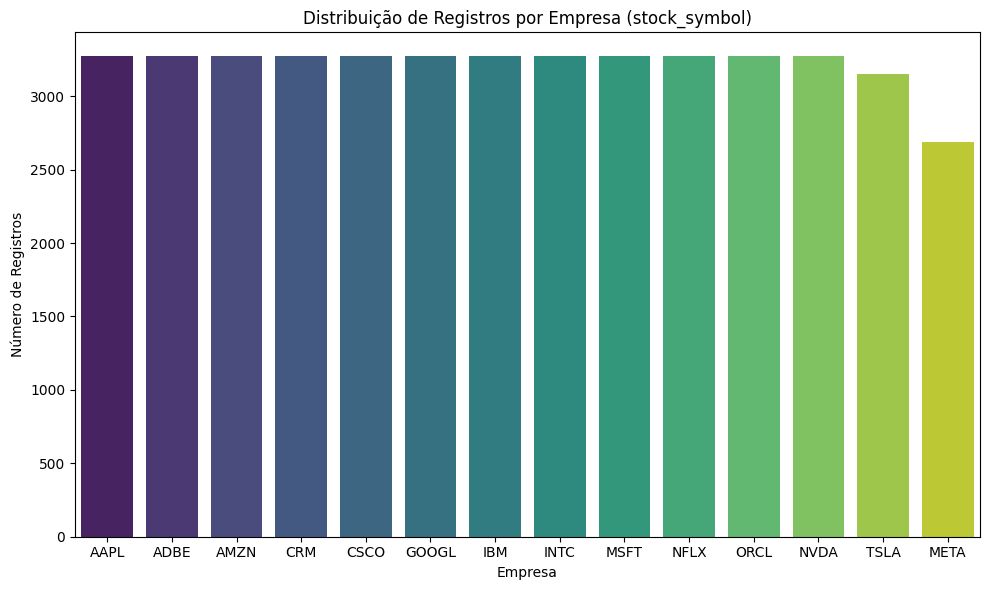

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar registros por empresa
frequencia_empresas = df_prices['stock_symbol'].value_counts().reset_index()
frequencia_empresas.columns = ['stock_symbol', 'frequencia']

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=frequencia_empresas, x='stock_symbol', y='frequencia', palette='viridis')
plt.title('Distribuição de Registros por Empresa (stock_symbol)')
plt.xlabel('Empresa')
plt.ylabel('Número de Registros')
plt.tight_layout()
plt.show()


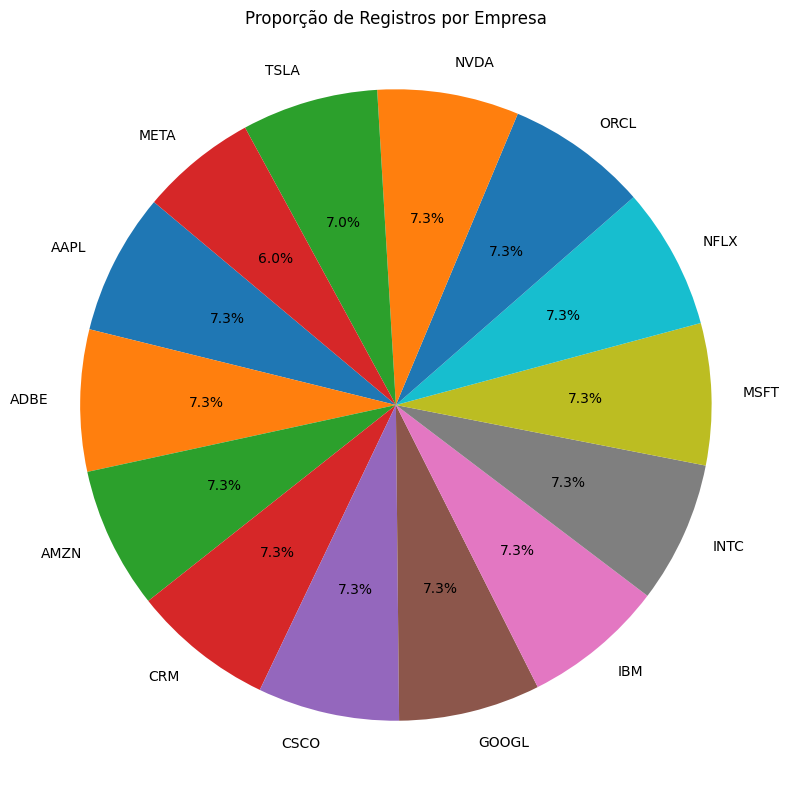

In [ ]:
# Gráfico de pizza
plt.figure(figsize=(8,8))
plt.pie(frequencia_empresas['frequencia'], labels=frequencia_empresas['stock_symbol'], autopct='%1.1f%%', startangle=140)
plt.title('Proporção de Registros por Empresa')
plt.axis('equal')  # Manter formato de círculo
plt.tight_layout()
plt.show()


In [ ]:
# Ver intervalo de datas por empresa
intervalo_datas = df_prices.groupby('stock_symbol')['date'].agg(['min', 'max']).reset_index()
intervalo_datas.columns = ['stock_symbol', 'data_inicial', 'data_final']
print(intervalo_datas)



   stock_symbol data_inicial data_final
0          AAPL   2010-01-04 2022-12-29
1          ADBE   2010-01-04 2022-12-29
2          AMZN   2010-01-04 2022-12-29
3           CRM   2010-01-04 2022-12-29
4          CSCO   2010-01-04 2022-12-29
5         GOOGL   2010-01-04 2022-12-29
6           IBM   2010-01-04 2022-12-29
7          INTC   2010-01-04 2022-12-29
8          META   2012-05-18 2023-01-24
9          MSFT   2010-01-04 2022-12-29
10         NFLX   2010-01-04 2022-12-29
11         NVDA   2010-01-04 2022-12-29
12         ORCL   2010-01-04 2022-12-29
13         TSLA   2010-06-30 2022-12-29


In [ ]:
# Medidas de tendência central agrupadas por empresa
df_tendencia = df_prices.groupby('stock_symbol').agg(
    media_close=('close', 'mean'),
    mediana_close=('close', 'median'),
    moda_close=('close', lambda x: x.mode().iloc[0] if not x.mode().empty else None),
    media_volume=('volume', 'mean'),
    mediana_volume=('volume', 'median'),
    moda_volume=('volume', lambda x: x.mode().iloc[0] if not x.mode().empty else None)
).reset_index()

# Exibir resultado
pd.set_option('display.float_format', '{:,.2f}'.format)
display(df_tendencia)


,stock_symbol,media_close,mediana_close,moda_close,media_volume,mediana_volume,moda_volume
0,AAPL,51.30,29.81,24.33,"256,325,536.41","166,674,000.00","90,956,700.00"
1,ADBE,186.02,97.72,30.95,"3,814,336.66","2,948,500.00","1,970,900.00"
2,AMZN,58.91,36.38,6.29,"88,339,985.05","74,592,000.00","58,272,000.00"
3,CRM,103.40,76.26,37.80,"6,910,973.46","5,548,800.00","2,777,100.00"
4,CSCO,33.50,29.54,24.70,"32,696,560.26","25,482,400.00","16,717,800.00"
5,GOOGL,49.15,38.54,14.51,"60,186,468.94","41,234,000.00","30,594,000.00"
6,IBM,148.47,143.04,140.04,"5,036,544.90","4,345,189.00","2,590,001.00"
7,INTC,36.49,34.34,21.46,"36,071,695.51","29,874,600.00","17,830,400.00"
8,META,147.91,142.07,26.85,"31,178,146.69","23,239,000.00","10,793,800.00"
9,MSFT,100.07,55.70,25.81,"38,016,469.34","32,280,800.00","20,818,000.00"


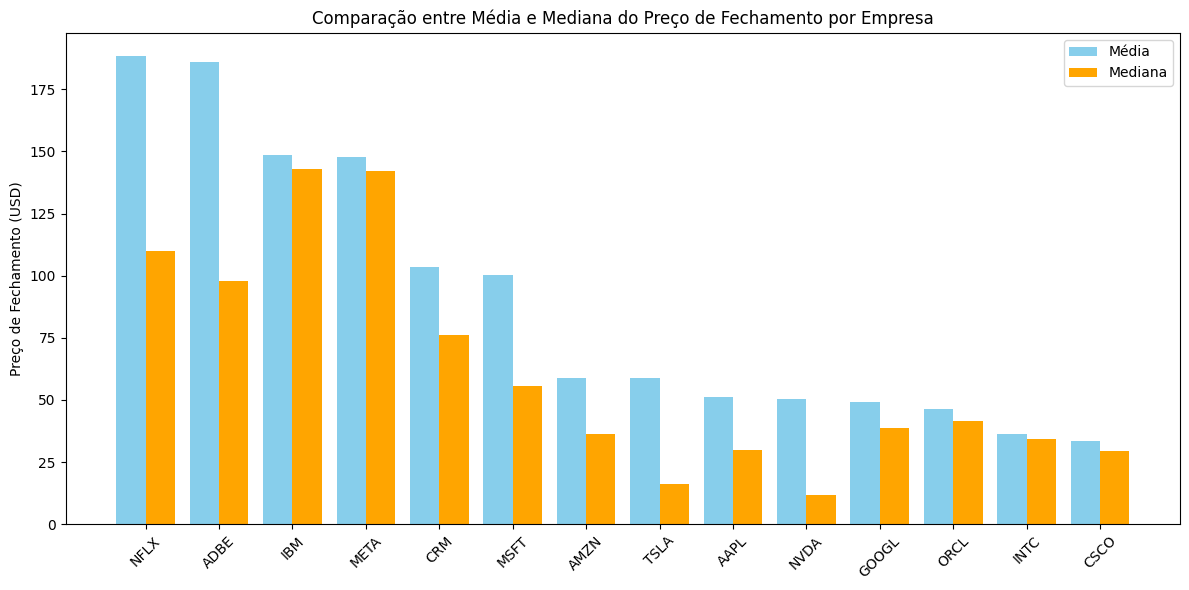

In [ ]:
# Plotar gráfico de barras lado a lado: média vs mediana do preço de fechamento
import numpy as np

df_tendencia_sorted = df_tendencia.sort_values(by='media_close', ascending=False)
x = np.arange(len(df_tendencia_sorted['stock_symbol']))

plt.figure(figsize=(12,6))
plt.bar(x - 0.2, df_tendencia_sorted['media_close'], width=0.4, label='Média', color='skyblue')
plt.bar(x + 0.2, df_tendencia_sorted['mediana_close'], width=0.4, label='Mediana', color='orange')
plt.xticks(x, df_tendencia_sorted['stock_symbol'], rotation=45)
plt.ylabel('Preço de Fechamento (USD)')
plt.title('Comparação entre Média e Mediana do Preço de Fechamento por Empresa')
plt.legend()
plt.tight_layout()
plt.show()


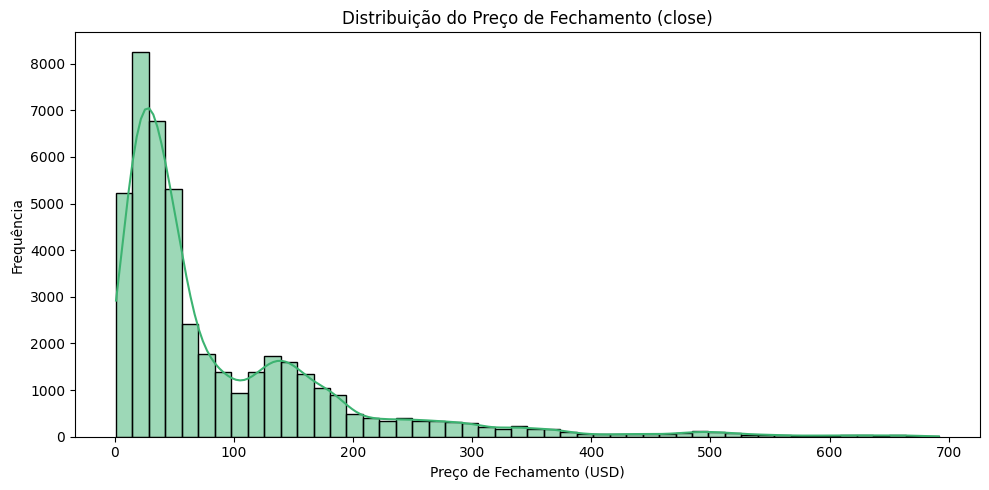

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df_prices['close'], kde=True, bins=50, color='mediumseagreen')
plt.title('Distribuição do Preço de Fechamento (close)')
plt.xlabel('Preço de Fechamento (USD)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


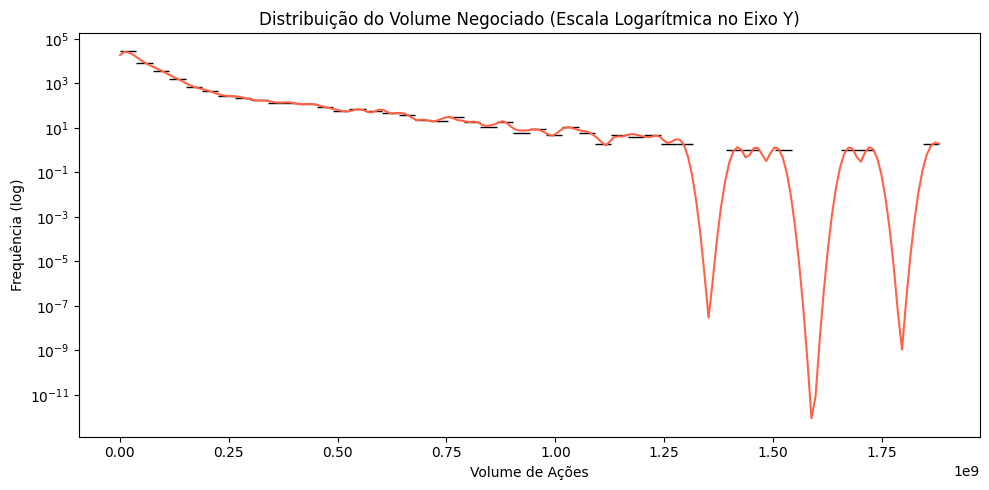

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df_prices['volume'], kde=True, bins=50, color='tomato', log_scale=(False, True))
plt.title('Distribuição do Volume Negociado (Escala Logarítmica no Eixo Y)')
plt.xlabel('Volume de Ações')
plt.ylabel('Frequência (log)')
plt.tight_layout()
plt.show()


In [ ]:
# Selecionar colunas numéricas principais
variaveis = ['open', 'high', 'low', 'close', 'adj_close', 'volume']

# Calcular medidas de dispersão
for var in variaveis:
    std = df_prices[var].std()
    var_ = df_prices[var].var()
    q1 = df_prices[var].quantile(0.25)
    q3 = df_prices[var].quantile(0.75)
    iqr = q3 - q1

    print(f"\n🔹 Variável: {var}")
    print(f"Desvio Padrão: {std:.2f}")
    print(f"Variância: {var_:.2f}")
    print(f"IQR (Q3 - Q1): {iqr:.2f}")



🔹 Variável: open
Desvio Padrão: 101.63
Variância: 10328.04
IQR (Q3 - Q1): 102.99

🔹 Variável: high
Desvio Padrão: 103.00
Variância: 10609.22
IQR (Q3 - Q1): 103.92

🔹 Variável: low
Desvio Padrão: 100.12
Variância: 10024.90
IQR (Q3 - Q1): 101.89

🔹 Variável: close
Desvio Padrão: 101.59
Variância: 10321.12
IQR (Q3 - Q1): 102.98

🔹 Variável: adj_close
Desvio Padrão: 101.00
Variância: 10200.19
IQR (Q3 - Q1): 91.60

🔹 Variável: volume
Desvio Padrão: 93247295.87
Variância: 8695058187601383.00
IQR (Q3 - Q1): 48768250.00


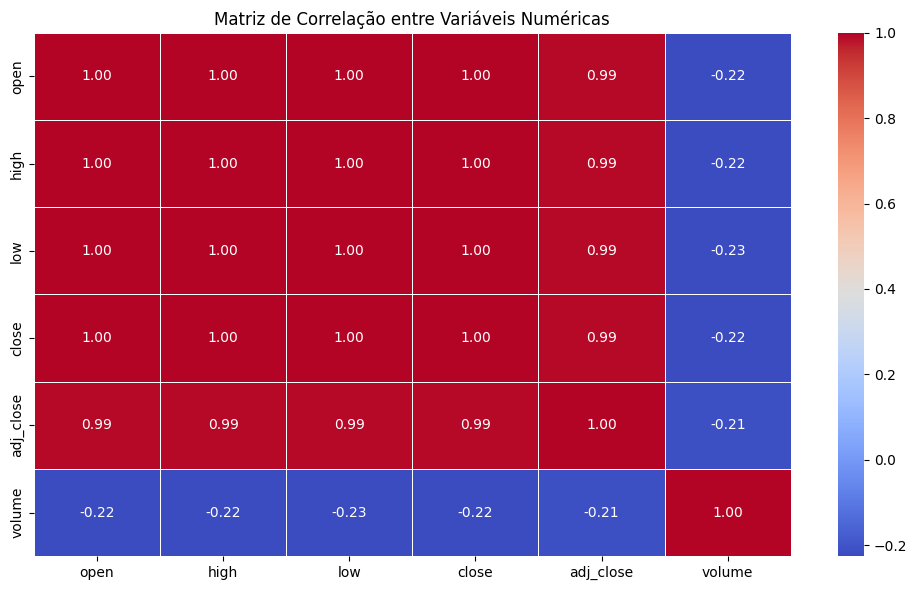

In [ ]:
# Matriz de correlação de Pearson
matriz_corr = df_prices[variaveis].corr(method='pearson')

# Exibir mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Calcular volume médio e desvio padrão do close por empresa
df_agg = df_prices.groupby('stock_symbol').agg(
    volume_medio=('volume', 'mean'),
    desvio_close=('close', 'std')
).reset_index()

# Definir ponto de corte: mediana do volume
mediana_volume = df_agg['volume_medio'].median()

# Criar grupos
grupo_alto = df_agg[df_agg['volume_medio'] >= mediana_volume]['desvio_close']
grupo_baixo = df_agg[df_agg['volume_medio'] < mediana_volume]['desvio_close']

# Aplicar teste t de comparação de médias
t_stat, p_valor = ttest_ind(grupo_alto, grupo_baixo, equal_var=False)

print("Teste t: comparação de desvio padrão entre grupos de volume")
print(f"Estatística t: {t_stat:.4f}")
print(f"Valor-p: {p_valor:.4f}")

# Ver médias dos grupos
print("\nMédia do desvio padrão:")
print(f"Grupo de ALTO volume: {grupo_alto.mean():.2f}")
print(f"Grupo de BAIXO volume: {grupo_baixo.mean():.2f}")


Teste t: comparação de desvio padrão entre grupos de volume
Estatística t: -0.7895
Valor-p: 0.4527

Média do desvio padrão:
Grupo de ALTO volume: 57.63
Grupo de BAIXO volume: 80.55


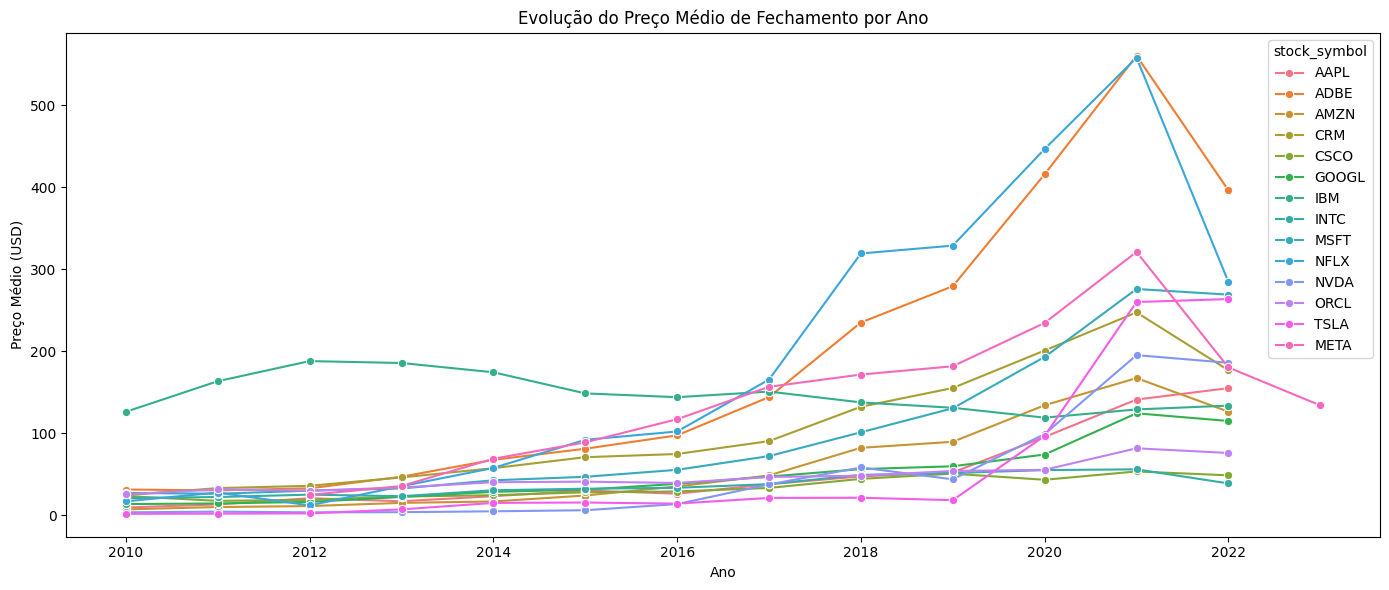

In [ ]:
df_prices['ano'] = df_prices['date'].dt.year
media_ano = df_prices.groupby(['ano', 'stock_symbol'])['close'].mean().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=media_ano, x='ano', y='close', hue='stock_symbol', marker='o')
plt.title('Evolução do Preço Médio de Fechamento por Ano')
plt.ylabel('Preço Médio (USD)')
plt.xlabel('Ano')
plt.tight_layout()
plt.show()


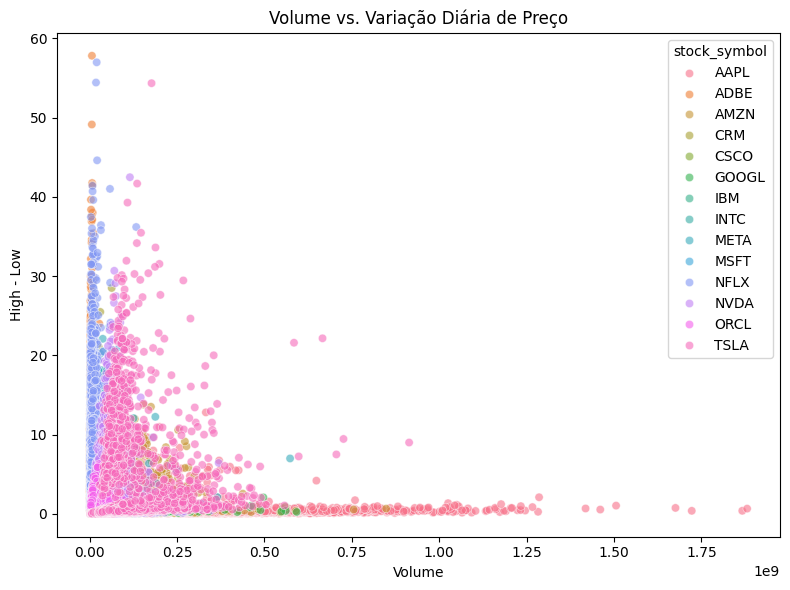

In [ ]:
df_prices['variacao_diaria'] = df_prices['high'] - df_prices['low']

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_prices, x='volume', y='variacao_diaria', hue='stock_symbol', alpha=0.6)
plt.title('Volume vs. Variação Diária de Preço')
plt.xlabel('Volume')
plt.ylabel('High - Low')
plt.tight_layout()
plt.show()


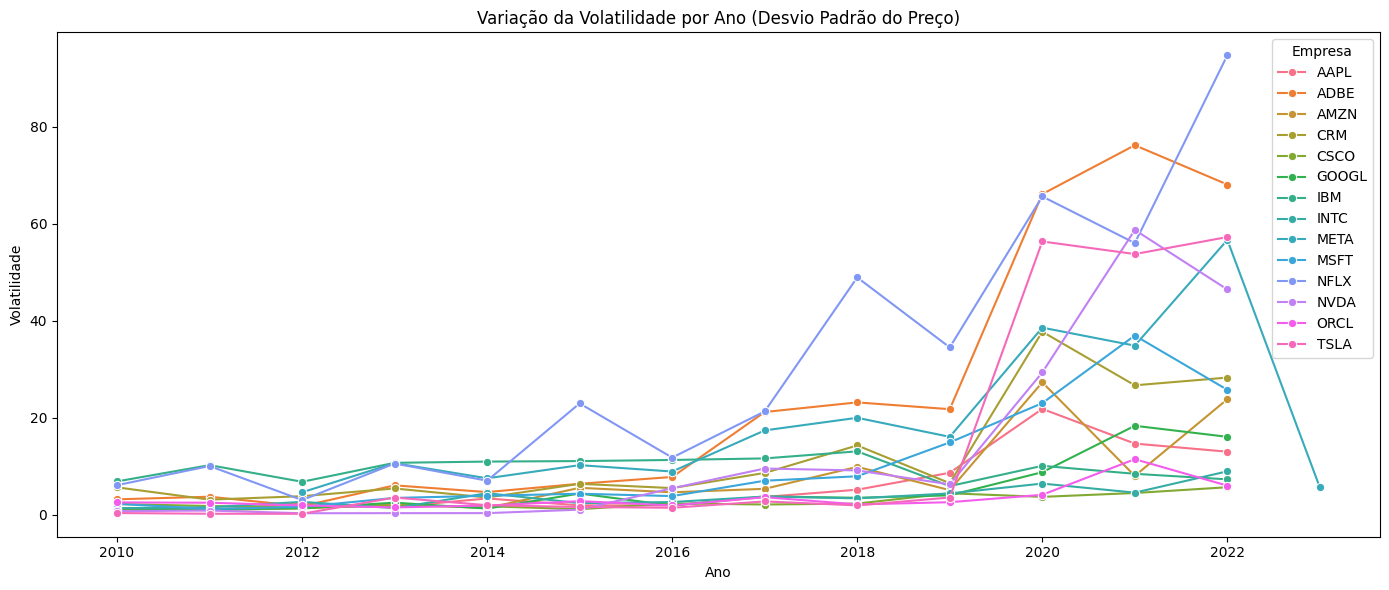

In [ ]:
df_prices['ano'] = df_prices['date'].dt.year
df_prices['mes'] = df_prices['date'].dt.month

# Exemplo: calcular desvio padrão por empresa e ano
vol_ano = df_prices.groupby(['stock_symbol', 'ano'])['close'].std().reset_index()
vol_ano.columns = ['Empresa', 'Ano', 'Desvio_Padrão_Close']

plt.figure(figsize=(14,6))
sns.lineplot(data=vol_ano, x='Ano', y='Desvio_Padrão_Close', hue='Empresa', marker='o')
plt.title('Variação da Volatilidade por Ano (Desvio Padrão do Preço)')
plt.ylabel('Volatilidade')
plt.tight_layout()
plt.show()


In [ ]:
df_nflx = df_prices[df_prices['stock_symbol'] == 'NFLX'].copy() # Adicionar .copy() para evitar SettingWithCopyWarning
df_nflx['coorte'] = df_nflx['date'].apply(lambda x: 'Antes 2018' if x < pd.Timestamp('2018-01-01') else 'Depois 2018')

# Comparar média e desvio padrão
df_nflx.groupby('coorte')['close'].agg(['mean', 'std', 'median'])


,mean,std,median
coorte,,,
Antes 2018,63.53,51.29,48.07
Depois 2018,387.83,119.40,361.87


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

df_amzn = df_prices[df_prices['stock_symbol'] == 'AMZN'].copy() # Adicionar .copy() para evitar SettingWithCopyWarning
# Converter a string para Timestamp antes de comparar
df_amzn['periodo'] = df_amzn['date'].apply(lambda x: 'Antes 2020' if x < pd.Timestamp('2020-01-01') else 'Depois 2020')

# Teste t
v1 = df_amzn[df_amzn['periodo'] == 'Antes 2020']['volume']
v2 = df_amzn[df_amzn['periodo'] == 'Depois 2020']['volume']
t_stat, p_valor = ttest_ind(v1, v2, equal_var=False)
print(f"Estatística t: {t_stat:.4f}, Valor-p: {p_valor:.4f}")


Estatística t: 5.6380, Valor-p: 0.0000


Coeficiente: -0.000000, Intercepto: 102.24, R²: 0.0505


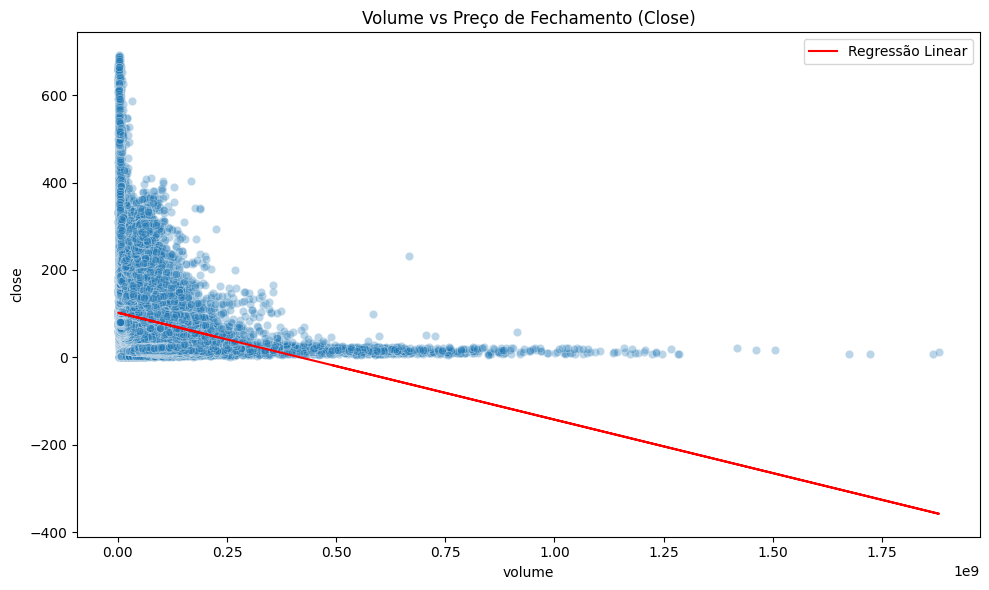

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Exemplo com todas as empresas
X = df_prices[['volume']]
y = df_prices['close']

modelo = LinearRegression()
modelo.fit(X, y)

# Coeficientes
print(f"Coeficiente: {modelo.coef_[0]:.6f}, Intercepto: {modelo.intercept_:.2f}, R²: {modelo.score(X, y):.4f}")

# Gráfico
plt.figure(figsize=(10,6))
sns.scatterplot(x='volume', y='close', data=df_prices, alpha=0.3)
plt.plot(df_prices['volume'], modelo.predict(X), color='red', label='Regressão Linear')
plt.title('Volume vs Preço de Fechamento (Close)')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
df_rr = df_prices.copy()
df_rr['pct_var'] = (df_rr['close'] - df_rr['open']) / df_rr['open']
df_rr['subiu_5pct'] = df_rr['pct_var'] >= 0.05

# Exemplo: comparar TSLA e MSFT
grupo_tsla = df_rr[df_rr['stock_symbol'] == 'TSLA']
grupo_msft = df_rr[df_rr['stock_symbol'] == 'MSFT']

# Probabilidade de "alta ≥ 5%"
p_tsla = grupo_tsla['subiu_5pct'].mean()
p_msft = grupo_msft['subiu_5pct'].mean()

risco_relativo = p_tsla / p_msft
print(f"Prob. TSLA: {p_tsla:.2%}, Prob. MSFT: {p_msft:.2%}, Risco Relativo: {risco_relativo:.2f}")


Prob. TSLA: 4.07%, Prob. MSFT: 0.31%, Risco Relativo: 13.30


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

df_log = df_rr.copy()
df_log['subiu'] = df_log['pct_var'] > 0  # target binário

# Variáveis
X = df_log[['volume']]
y = df_log['subiu']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo_log = LogisticRegression()
modelo_log.fit(X_train, y_train)

# Avaliação
y_pred = modelo_log.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.49      1.00      0.66      6605
        True       0.00      0.00      0.00      6922

    accuracy                           0.49     13527
   macro avg       0.24      0.50      0.33     13527
weighted avg       0.24      0.49      0.32     13527



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X = df_prices[['volume']]
y = df_prices['close']

modelo_lr = LinearRegression()
modelo_lr.fit(X, y)

# Resultados
r2 = modelo_lr.score(X, y)
coef = modelo_lr.coef_[0]
intercepto = modelo_lr.intercept_
y_pred = modelo_lr.predict(X)
erro_padrao = np.sqrt(mean_squared_error(y, y_pred))

print(f"Coeficiente (volume): {coef:.6f}")
print(f"Intercepto: {intercepto:.2f}")
print(f"R²: {r2:.4f}")
print(f"Erro padrão (RMSE): {erro_padrao:.2f}")


Coeficiente (volume): -0.000000
Intercepto: 102.24
R²: 0.0505
Erro padrão (RMSE): 98.99


In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

df_log = df_prices.copy()
df_log['subiu'] = (df_log['close'] > df_log['open']).astype(int)  # variável binária

X = df_log[['volume']]
y = df_log['subiu']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo_log = LogisticRegression()
modelo_log.fit(X_train, y_train)

# Predições
y_pred = modelo_log.predict(X_test)
y_prob = modelo_log.predict_proba(X_test)[:, 1]

# Avaliação
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

print("Matriz de Confusão:\n", conf_matrix)
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Matriz de Confusão:
 [[6605    0]
 [6922    0]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.49      1.00      0.66      6605
           1       0.00      0.00      0.00      6922

    accuracy                           0.49     13527
   macro avg       0.24      0.50      0.33     13527
weighted avg       0.24      0.49      0.32     13527



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


### 🤖 Regressão Logística – Prever Alta Diária da Ação (Resultados Reais)

**Objetivo:**  
Criar um modelo para prever se uma ação vai fechar o dia em alta (`close > open`) com base apenas no volume negociado.

**Resultados do Modelo:**

- Acurácia: **0.49** → o modelo acertou 49% das previsões
- **Classe False** (não subiu):  
  - Precisão: **0.49**
  - Recall: **1.00**
- **Classe True** (subiu):  
  - Precisão: **0.00**
  - Recall: **0.00**
- **F1-score da classe True**: **0.00**
- Support (tamanho das classes):  
  - `False`: 6.605 exemplos  
  - `True`: 6.922 exemplos

**Interpretação Técnica:**

- O modelo **aprendeu a prever apenas a classe negativa (queda ou estabilidade)** e **ignora completamente os dias em que a ação sobe**.
- A precisão e recall da classe `True` (ação subiu) são **zero** — o modelo **falha completamente em identificar altas**.
- Isso indica **forte desbalanceamento ou ausência de relação entre volume e subida no preço**.
- A acurácia de 49% é **enganosa**, pois o modelo só acerta por “chutar” a maioria como `False`.

**Conclusão Leiga:**

> “Esse modelo só acerta quando diz que o preço **não vai subir**. Ele **não consegue identificar quando uma ação realmente sobe no dia**. Ou seja, **o volume sozinho não é suficiente** para prever se uma ação vai fechar em alta — precisamos de mais informações, como tendência de dias anteriores, contexto do mercado ou notícias.”
